<a href="https://colab.research.google.com/github/youssef1404/Cleaning_Robot_Project/blob/Metal-Detection/Out_of_memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 33.4 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks


Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.7/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torch               ✅ 2.5.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.67.1>=4.64.0
psu

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ztxKhIB64iRqH6spaARW")
project = rf.workspace("out-of-memory").project("metal-detector-oorvx")
version = project.version(1)
dataset = version.download("yolov8")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to metal-detector-1 in yolov8:: 100%|██████████| 502/502 [00:00<00:00, 6968.32it/s]


In [4]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 49.7M/49.7M [00:01<00:00, 46.4MB/s]
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/metal-detector-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

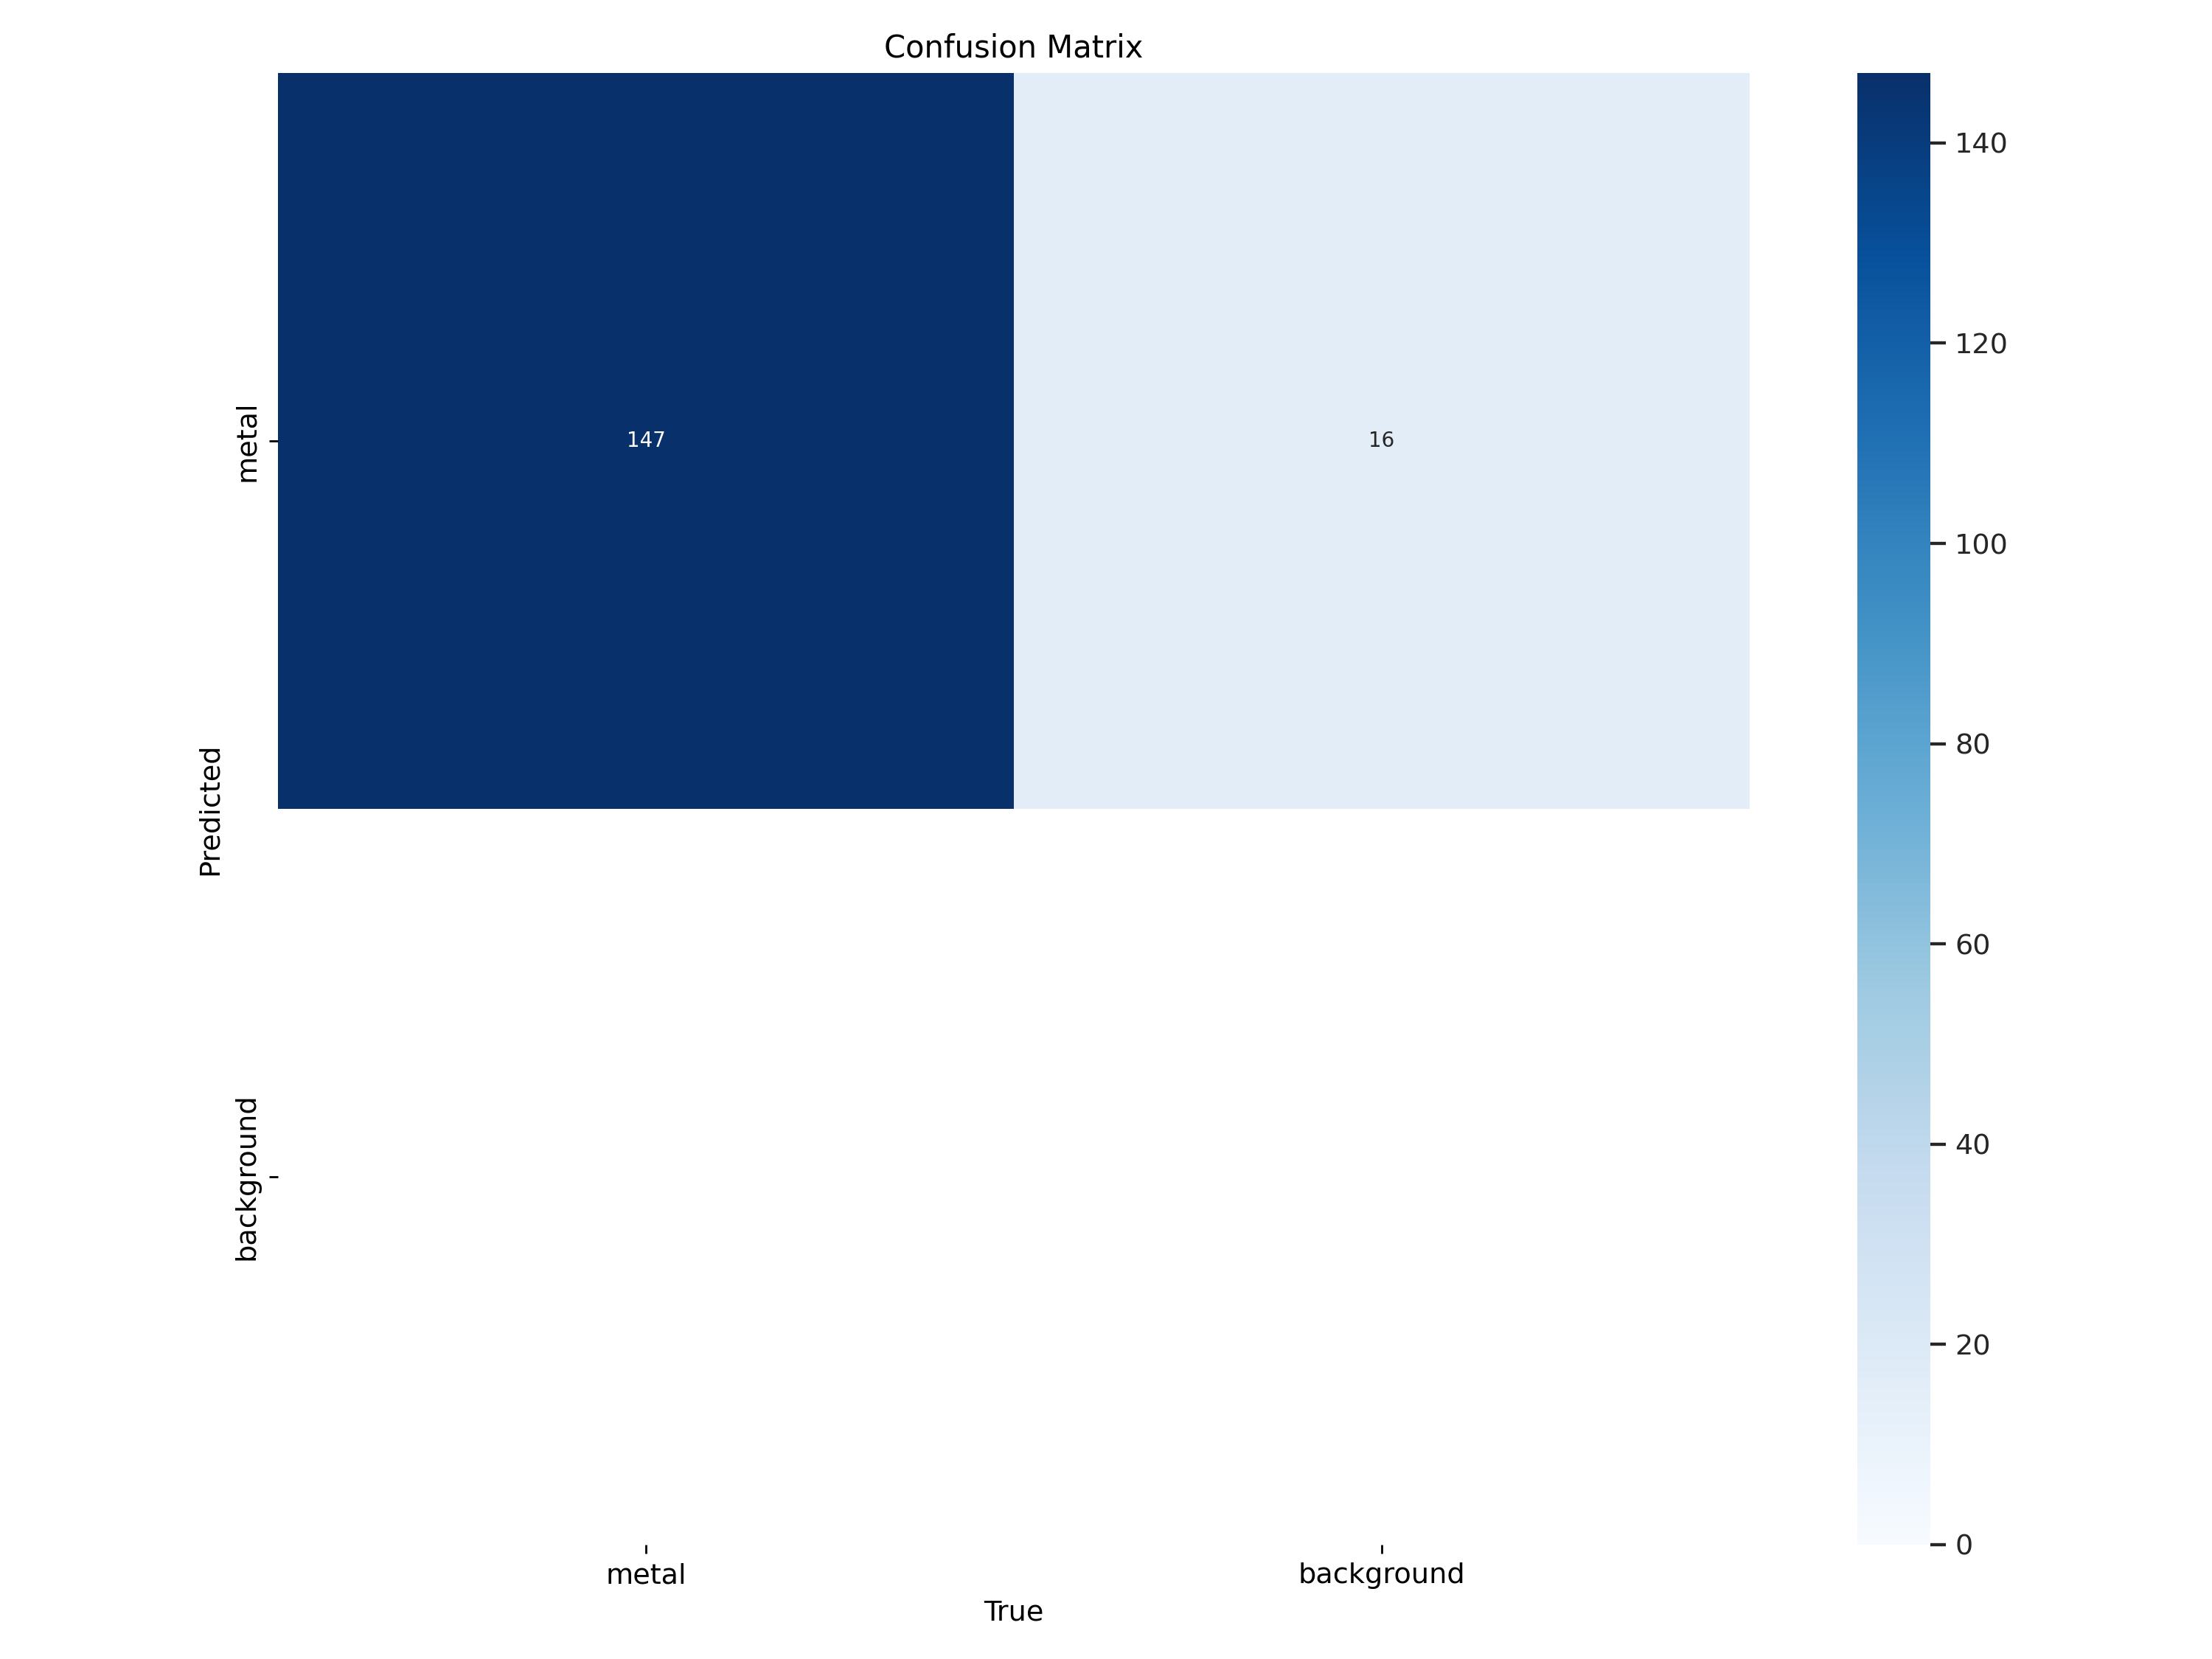

In [5]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

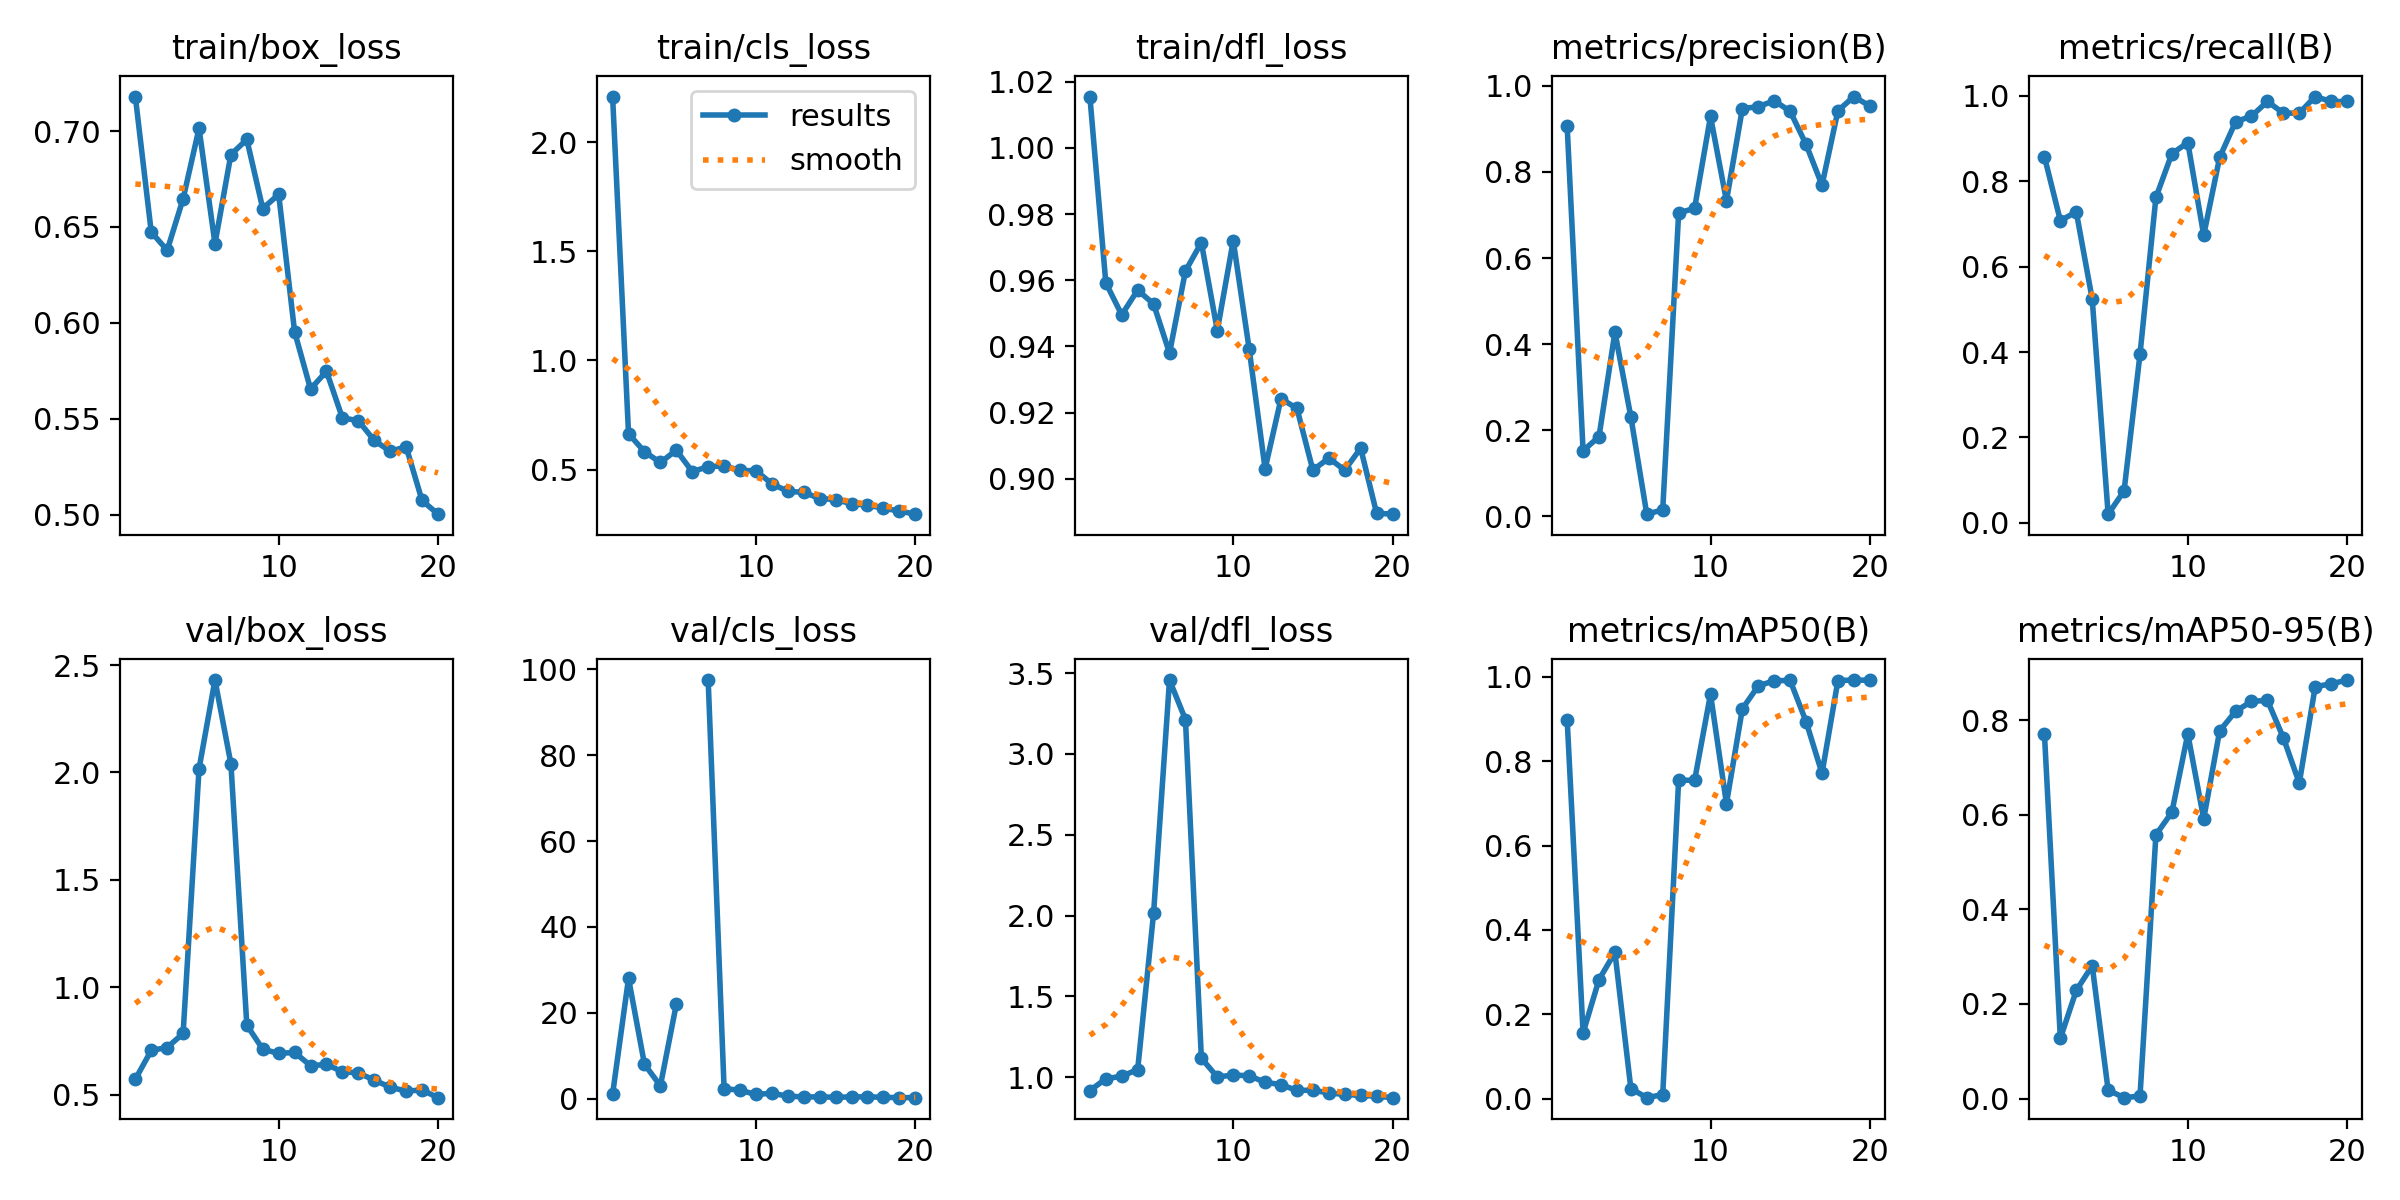

In [6]:
Image(filename='/content/runs/detect/train/results.png', width=600)

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights//best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/metal-detector-1/valid/labels.cache... 49 images, 1 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.15it/s]
                   all         49        147      0.953      0.986      0.992      0.886
Speed: 7.4ms preprocess, 25.4ms inference, 0.0ms loss, 22.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [9]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights//best.pt conf=0.5 source={dataset.location}/test/images

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/24 /content/metal-detector-1/test/images/IMG_6090_JPG.rf.31a5b125484489186c99e89844e29fc0.jpg: 640x640 3 metals, 37.0ms
image 2/24 /content/metal-detector-1/test/images/IMG_6102_JPG.rf.cafd6540e291161691c9a6ff54b70ae2.jpg: 640x640 2 metals, 37.0ms
image 3/24 /content/metal-detector-1/test/images/IMG_6105_JPG.rf.f5e0e6ad469bffd305906008d973ed07.jpg: 640x640 3 metals, 36.9ms
image 4/24 /content/metal-detector-1/test/images/IMG_6106_JPG.rf.9164c25e9efa3d368de9b2e59c4a9fa0.jpg: 640x640 6 metals, 37.0ms
image 5/24 /content/metal-detector-1/test/images/IMG_6114_JPG.rf.83fb45288579b75bfd36535b86c78e80.jpg: 640x640 3 metals, 37.0ms
image 6/24 /content/metal-detector-1/test/images/IMG_6133_JPG.rf.273127b41b513969e0403a6e36730331.jpg: 640x640 3 metals, 30.9ms
image 7/24 /content/metal-detector-1/test/images/IMG_6165_JPG.rf.b

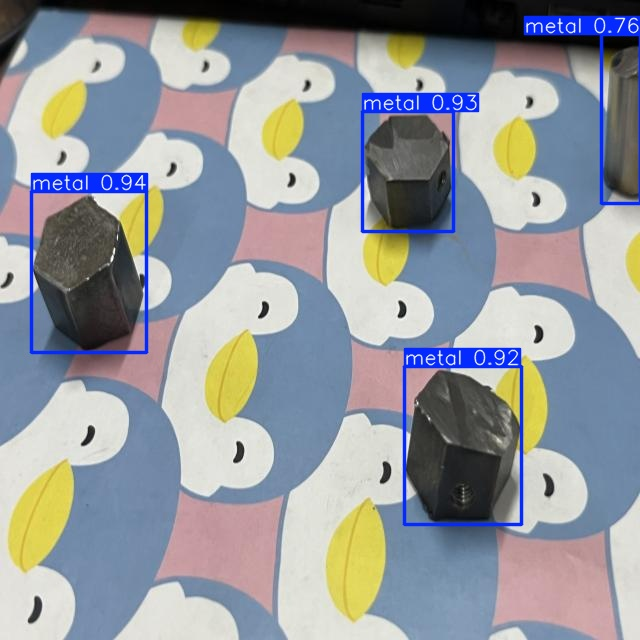

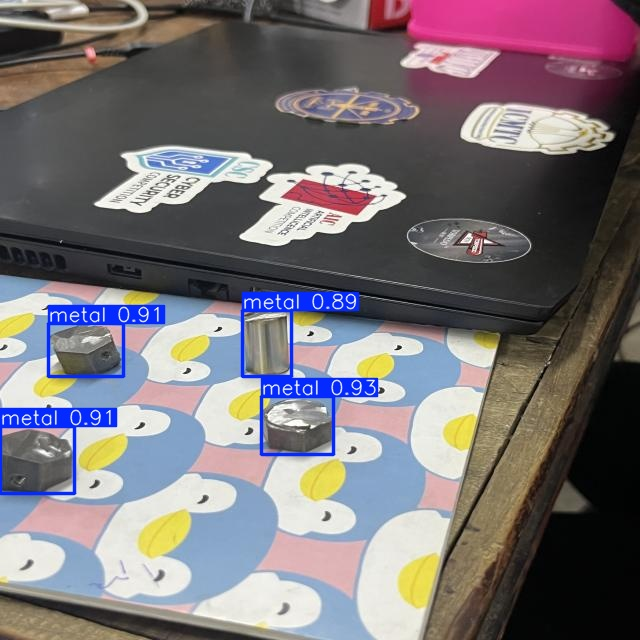

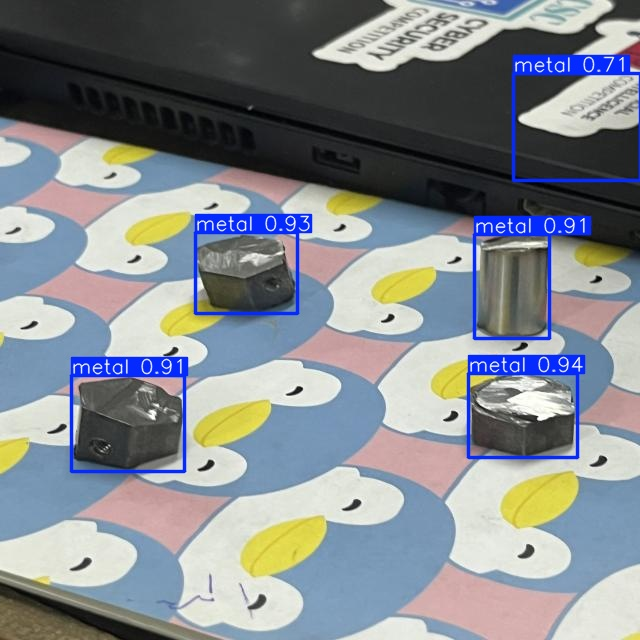

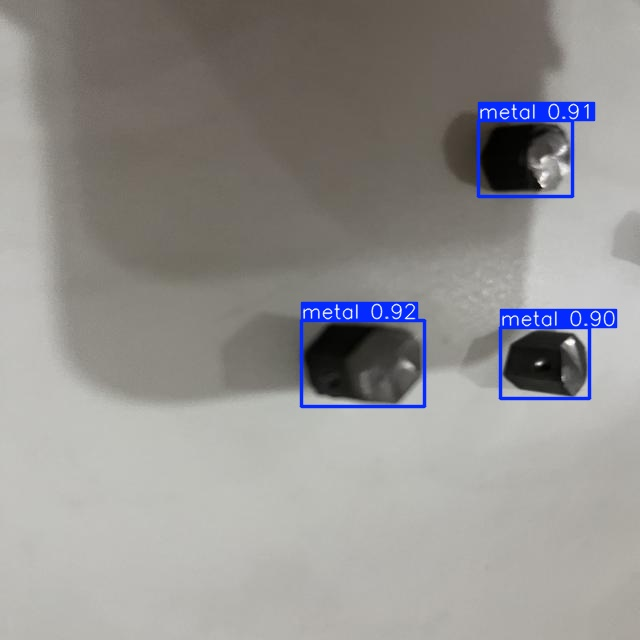

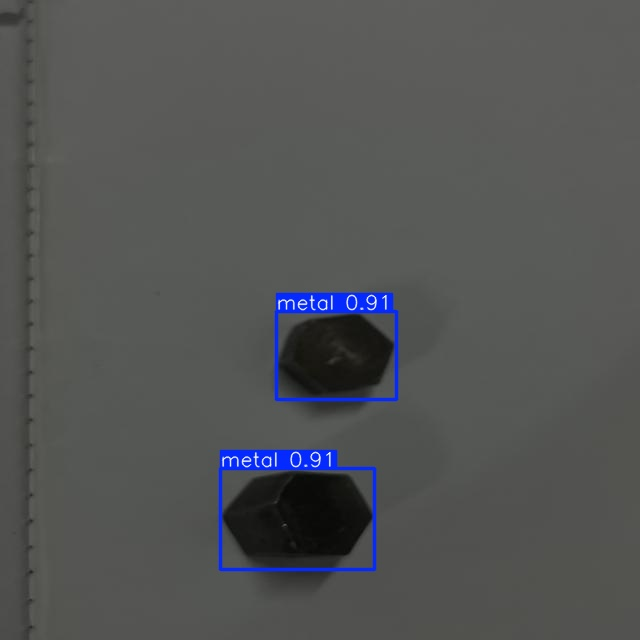

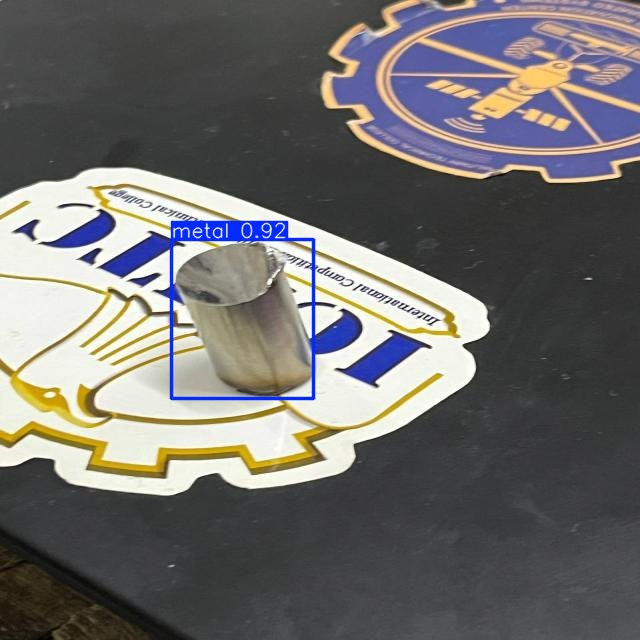

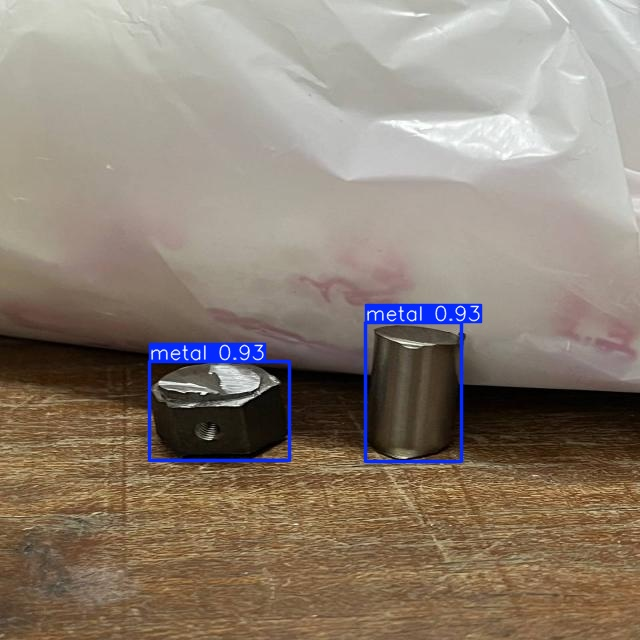

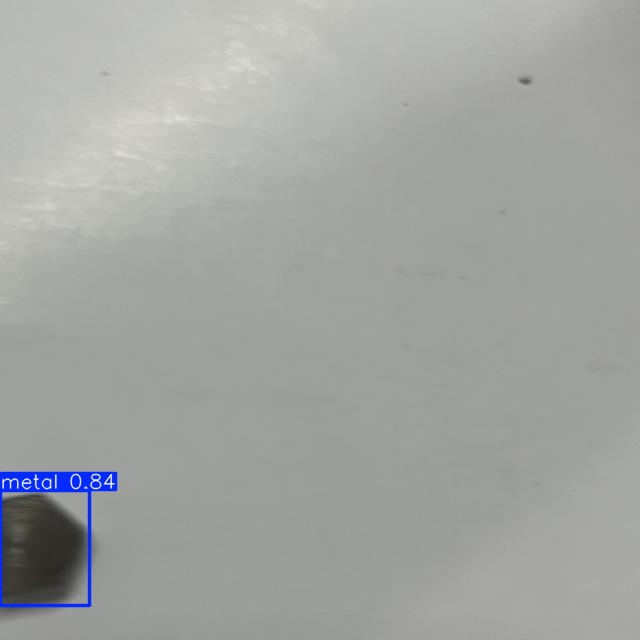

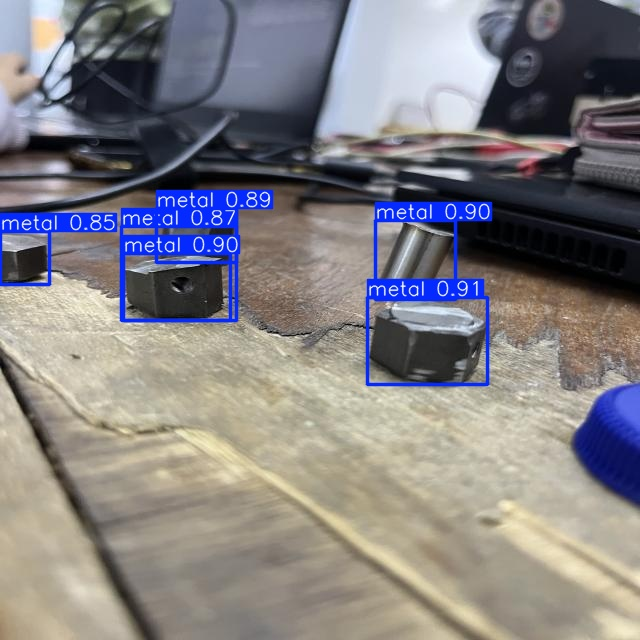

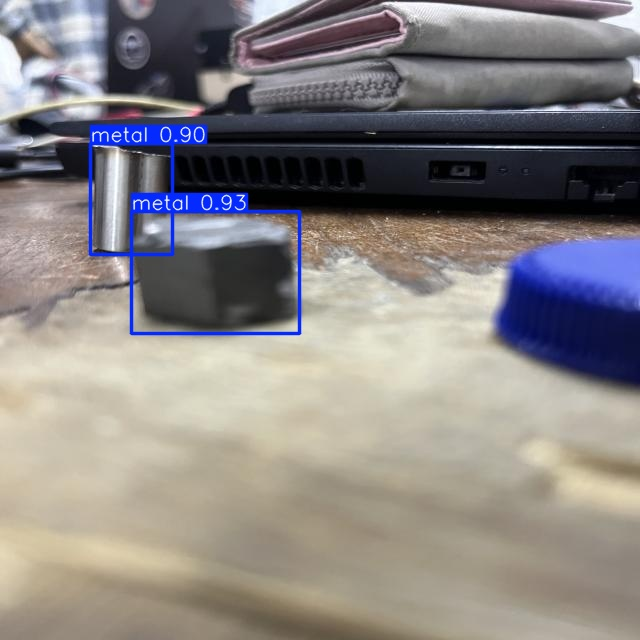

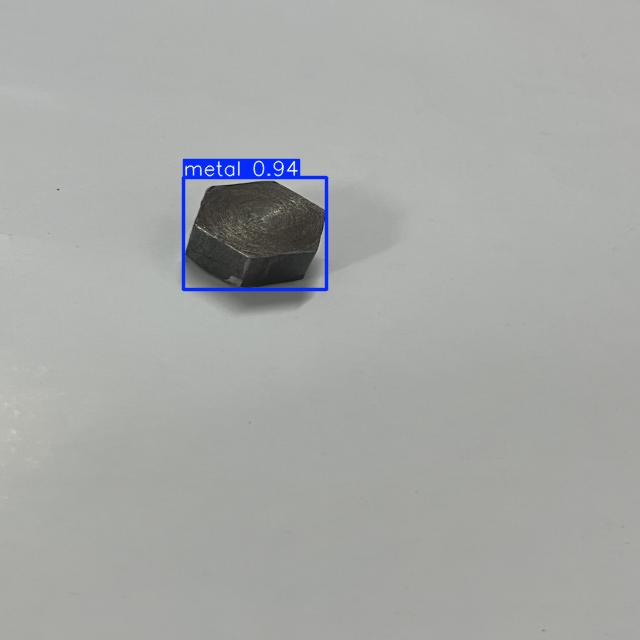

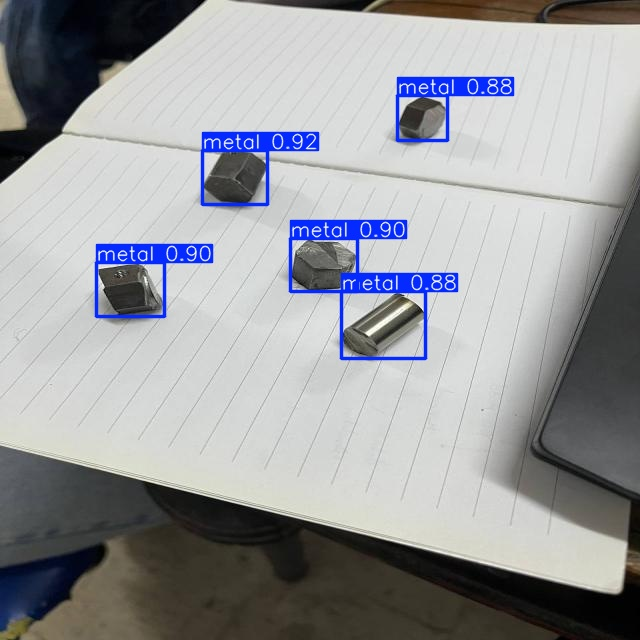

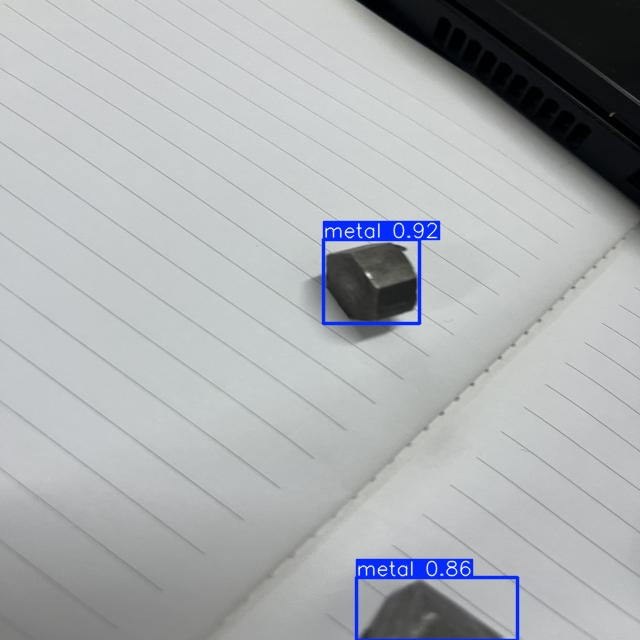

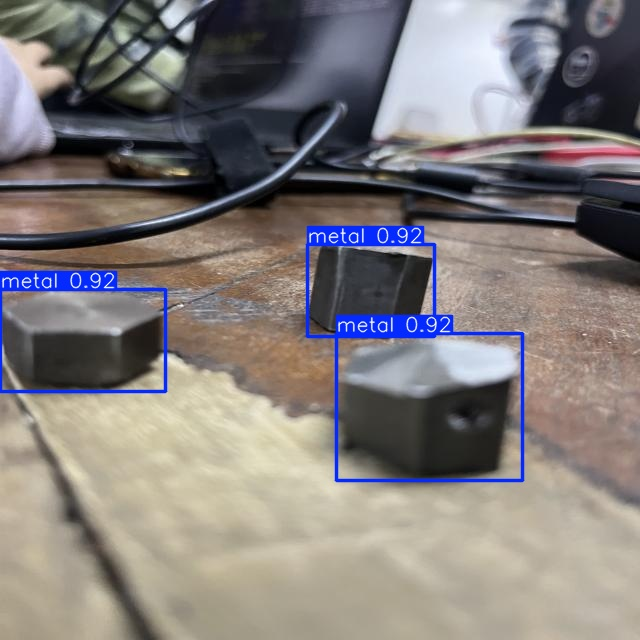

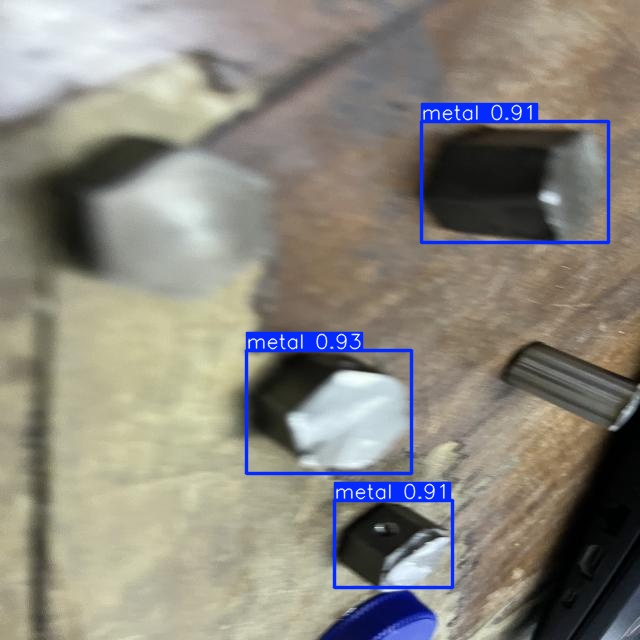

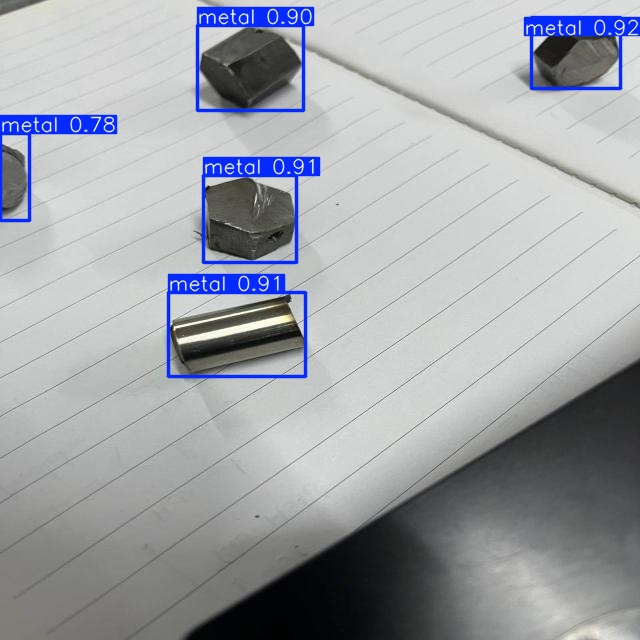

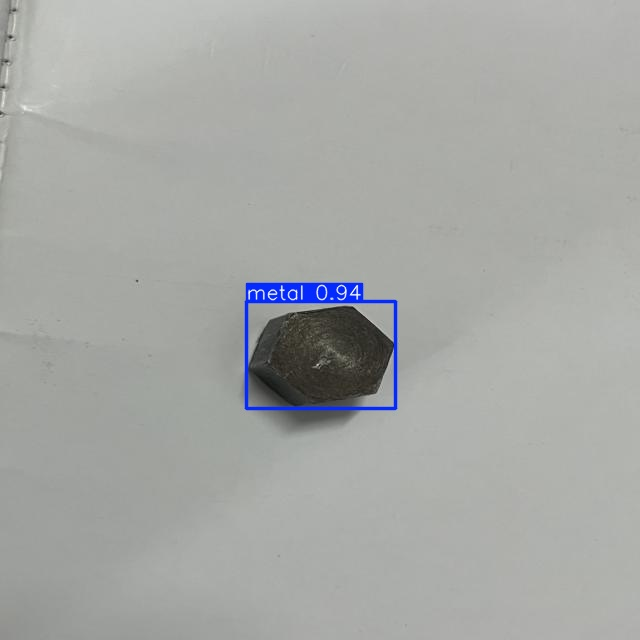

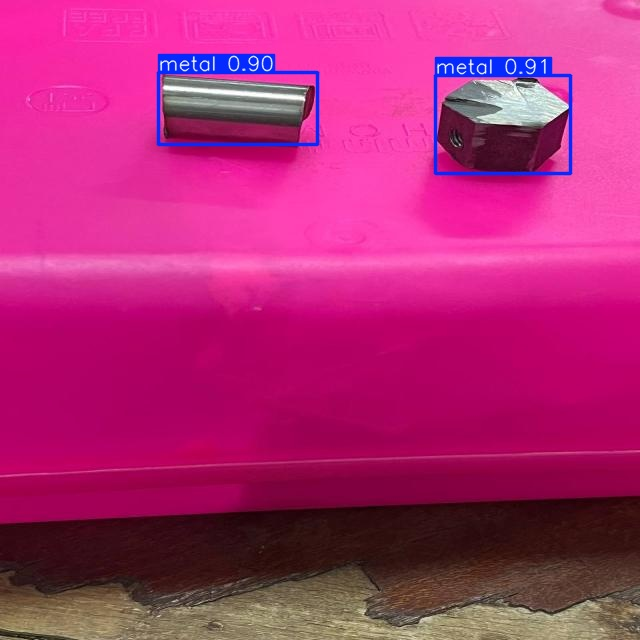

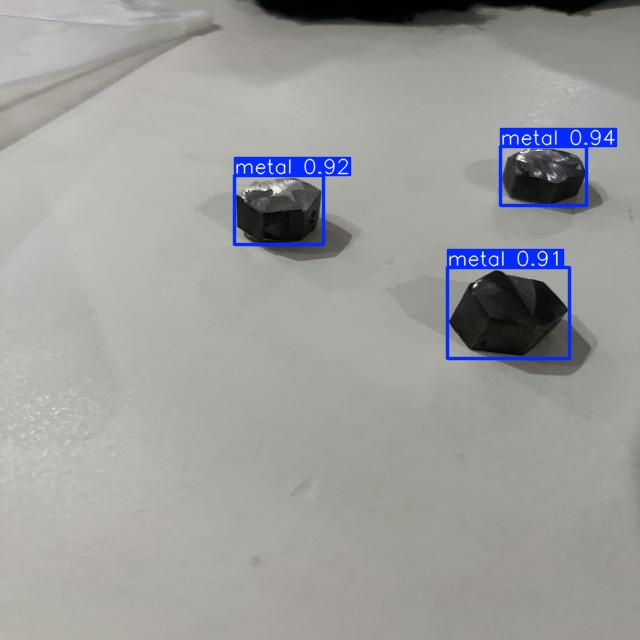

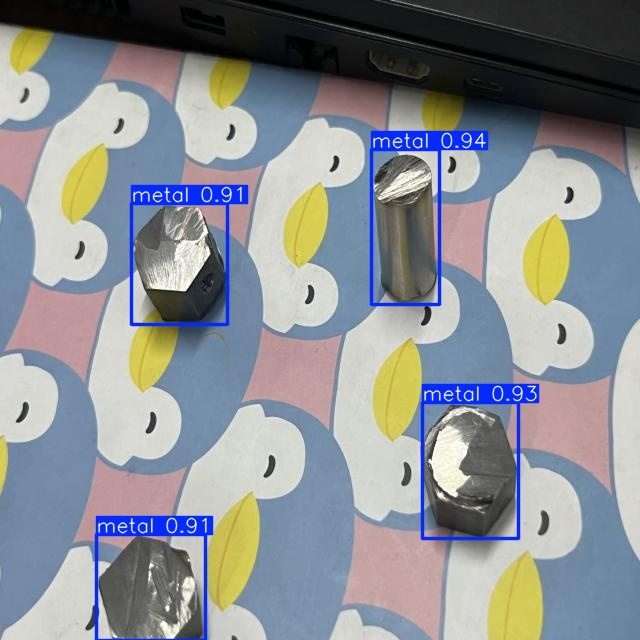

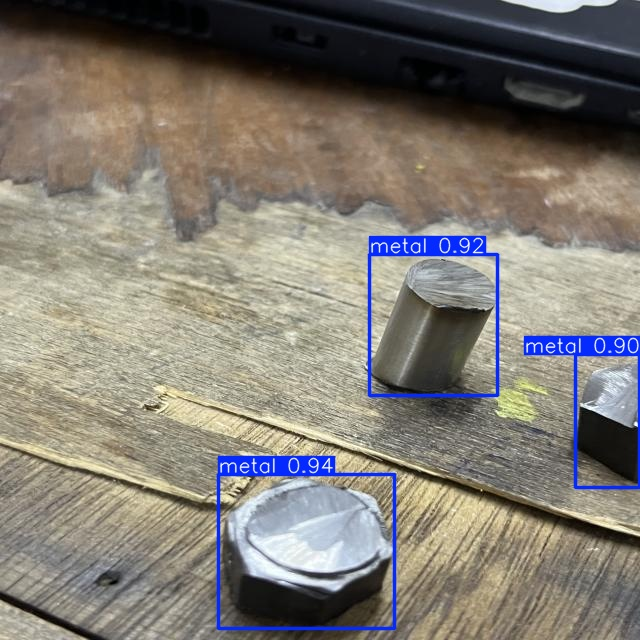

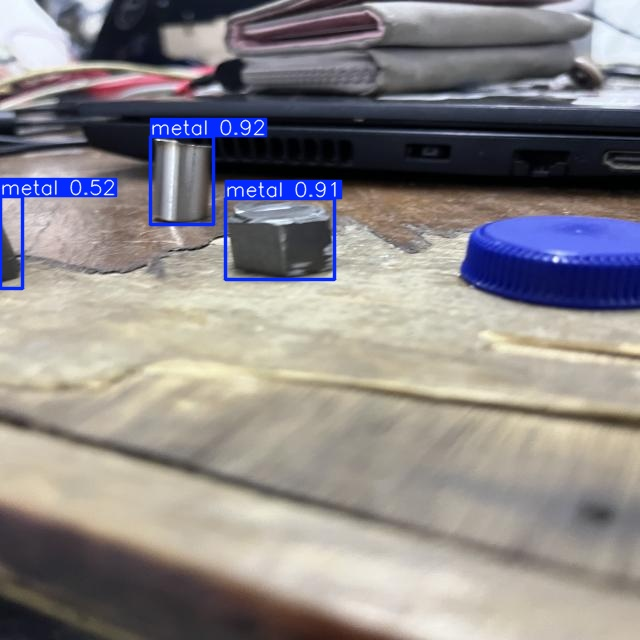

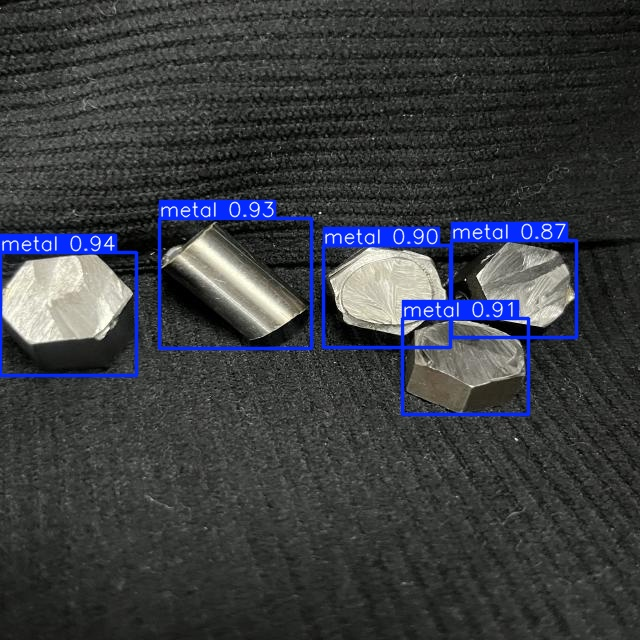

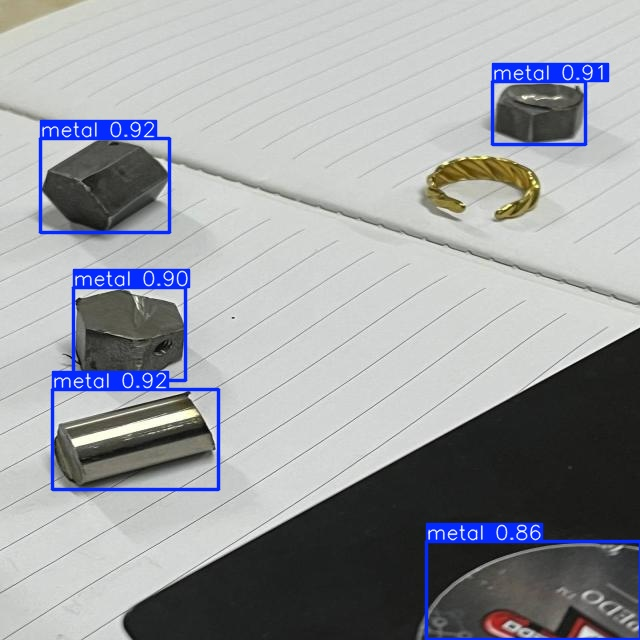

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")